## Install deps

In [78]:
# %pip install pandas
# %pip install scikit-learn
# %pip install seaborn

## Imports

In [79]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

## Load dataset

In [80]:
dataframe = read_csv("clear_all_data.csv", index_col=0)
dataframe.head()

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district_Академический,...,underground_Шоссе Энтузиастов,underground_Щербинка,underground_Щукинская,underground_Щёлковская,underground_Электрозаводская,underground_Юго-Восточная,underground_Юго-Западная,underground_Южная,underground_Ясенево,underground_Яхромская
1,17,41,1,40.4,618811,25000000,2021,15.2,9.1,False,...,False,False,False,False,False,False,False,False,False,False
3,9,41,1,40.5,617283,25000000,2022,17.3,9.3,False,...,False,False,False,False,False,False,False,False,False,False
5,6,13,1,71.1,983122,69900000,2019,37.1,12.8,False,...,False,False,False,False,False,False,False,False,False,False
7,33,36,1,75.0,626666,47000000,2020,35.0,20.0,False,...,False,False,False,False,False,False,False,False,False,False
9,6,41,1,41.0,724390,29700000,2022,24.0,6.0,False,...,False,False,False,False,False,False,False,False,False,False


## Define args and y

In [81]:
X = dataframe.drop("price_per_m2", axis=1)
y = dataframe.price_per_m2


In [82]:
X.shape

(4233, 1314)

In [83]:
y.shape

(4233,)

## Split to train and test dataframes

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [85]:
X_train.shape

(3809, 1314)

## Define and train model

### Lasso regression

* ### Create CV for lasso regression model

In [86]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=5)

* ### Learn model

In [87]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=cv, n_jobs=-1, max_iter=10000)
lasso_model.fit(X_train, y_train)

LassoCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
        max_iter=10000, n_jobs=-1)

### Linear regression

In [88]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

### ElasticNET

In [89]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(cv=cv, n_jobs=-1, max_iter=10000)
elastic_model.fit(X_train, y_train)

ElasticNetCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             max_iter=10000, n_jobs=-1)

In [90]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

c:\Users\mihsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.13131e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

## Make prediction

In [91]:
linear_model_y_pred = linear_model.predict(X_test)

In [92]:
lasso_model_y_pred = lasso_model.predict(X_test)

In [93]:
elastic_model_y_pred = elastic_model.predict(X_test)

In [94]:
ridge_model_y_pred = ridge_model.predict(X_test)

## Plot of data

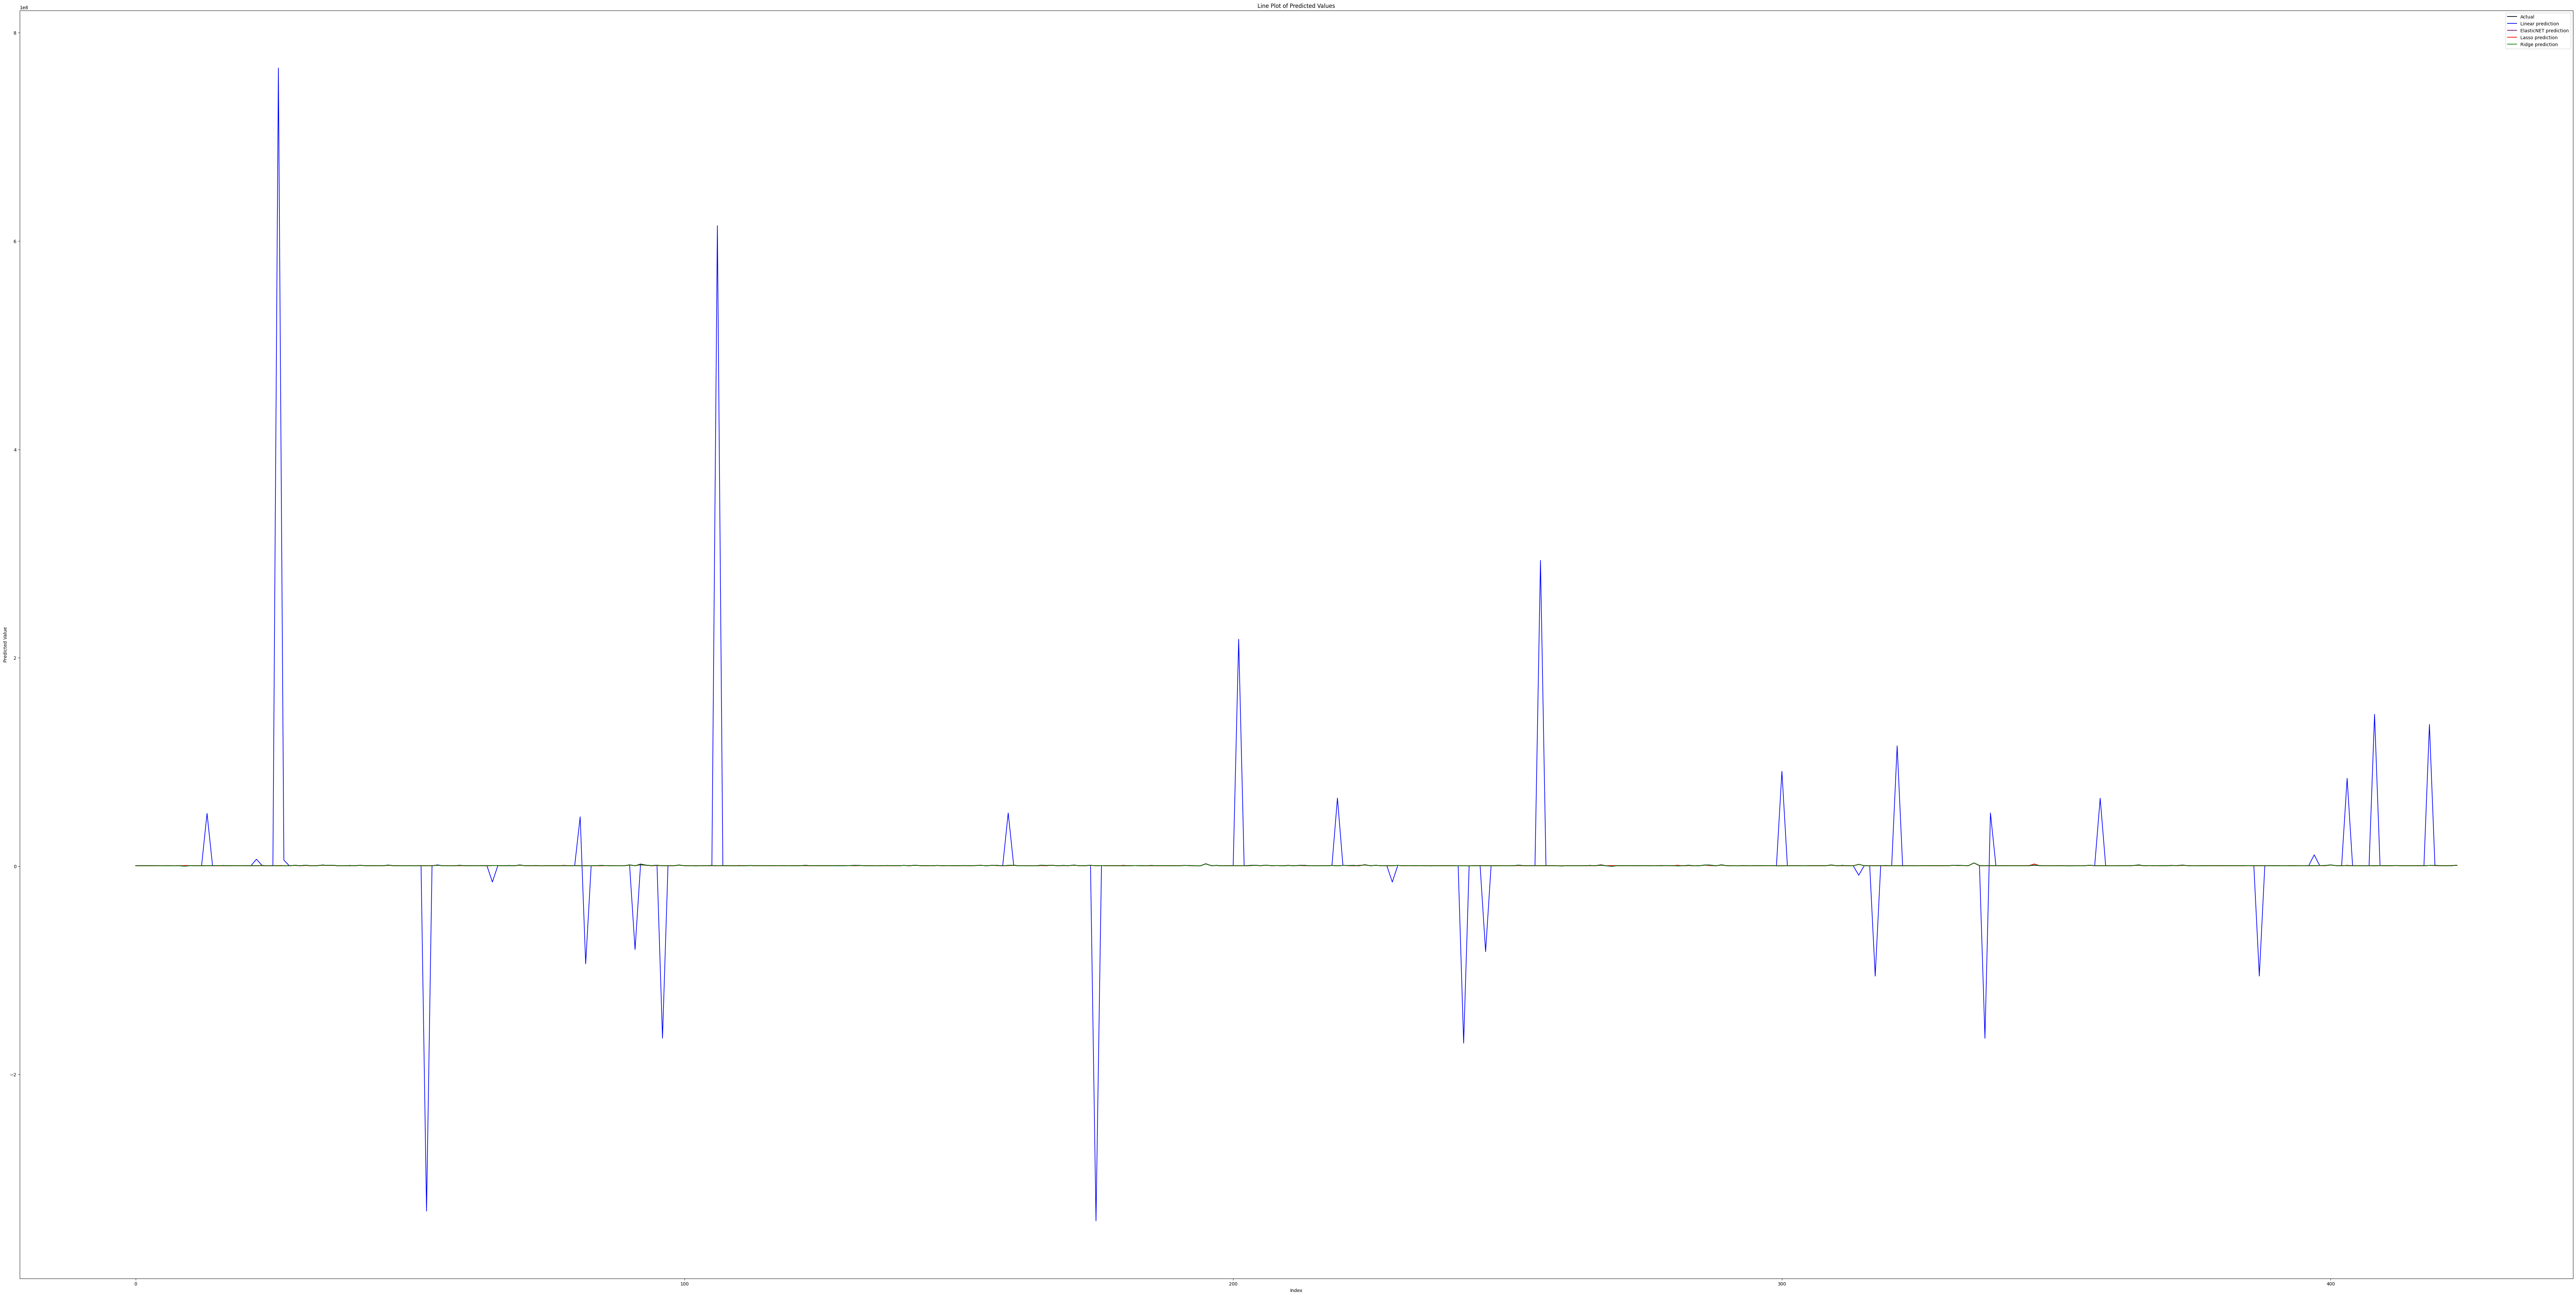

In [95]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(100, 50))
sns.lineplot(x=range(len(y_test)), y=y_test, color='black', label='Actual')
sns.lineplot(x=range(len(linear_model_y_pred)), y=linear_model_y_pred, color="blue", label="Linear prediction")
sns.lineplot(x=range(len(elastic_model_y_pred)), y=elastic_model_y_pred, color="purple", label="ElasticNET prediction")
sns.lineplot(x=range(len(lasso_model_y_pred)), y=lasso_model_y_pred, color="red", label="Lasso prediction")
sns.lineplot(x=range(len(ridge_model_y_pred)), y=ridge_model_y_pred, color="green", label="Ridge prediction")
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Line Plot of Predicted Values')
plt.show()

## Check score of model

In [96]:
linear_score = linear_model.score(X_test, y_test)
lasso_score = lasso_model.score(X_test, y_test)
elastic_score = elastic_model.score(X_test, y_test)
ridge_score = ridge_model.score(X_test, y_test)
print(f"Scores: \n\tLinear: {linear_score}\n\tLasso: {lasso_score}\n\tElasticNET: {elastic_score}\n\tRidge {ridge_score}")

Scores: 
	Linear: -48868.593572769
	Lasso: 0.7273720540144205
	ElasticNET: 0.7272520217157992
	Ridge 0.9010356658435936


## Mean errors

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Absolute

In [98]:
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_model_y_pred)
lasso_mae = mean_absolute_error(y_true=y_test, y_pred=lasso_model_y_pred)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_model_y_pred)
print(f"Root Mean Absolute Error \t\nLinear: {linear_mae}\t\nLasso: {lasso_mae}\t\nRidge {ridge_mae}")


Root Mean Absolute Error 	
Linear: 10654900.843551353	
Lasso: 98281.75783364897	
Ridge 55788.446526846594


### Squared

In [99]:
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_model_y_pred)
lasso_mse = mean_squared_error(y_true=y_test, y_pred=lasso_model_y_pred)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_model_y_pred)
print(f"Root Mean Squared Error \t\nLinear: {linear_mse}\t\nLasso: {lasso_mse}\t\nRidge {ridge_mae}")


Root Mean Squared Error 	
Linear: 3628483976910835.5	
Lasso: 20242160029.29892	
Ridge 55788.446526846594
